# **ZOMATO DATA ANALYSIS PROJECT**

In [2]:
#Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## **DATA ANALYSIS** 

In [3]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Zomato data .csv") # To see data 
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


### **CONVERT THE DATATYPE OF COLUMN - rate**

In [5]:
def change_rate(value):
    value= str(value).split('/')
    value= value[0]
    return float(value)
df['rate']= df['rate'].apply(change_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## **Q1 WHAT TYPE OF RESTURANT DO THE MAJORITY OF THE CUSTOMERS ORDER FROM?**

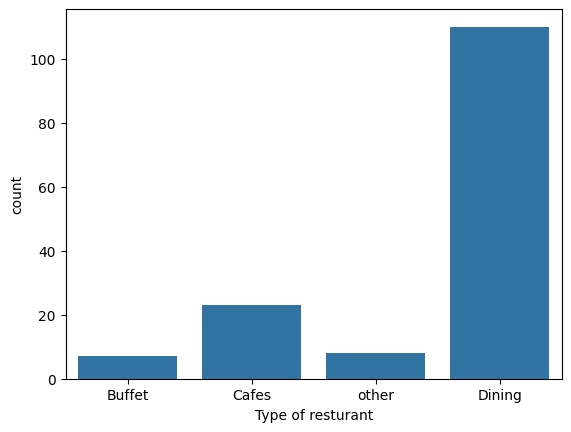

In [6]:

sns.countplot(data=df,x="listed_in(type)")
plt.xlabel("Type of resturant")
plt.show()

### ```CONCLUSION```: Majority of the resturant falls in dinning category.

## **Q2 HOW MANY VOTES HAS EACH TYPE OF RESTAURANT RECIEVED FROM CUSTOMERS?**

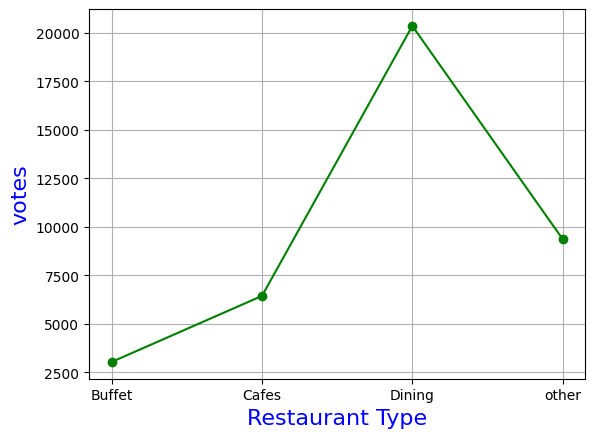

In [7]:
groupd_data = df.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes': groupd_data})
plt.plot(result,c='green',marker ="o")

plt.xlabel("Restaurant Type",fontsize = 16,c='b')
plt.ylabel("votes",fontsize = 16,c='b')
plt.grid()
plt.show()


### ```CONCLUSION```: Dinning restaurants has recieved maximum votes.

## **Q3 WHAT ARE THE RATING THAT HAS THE MAJORITY OF RESTRAURANT HAVE RECEIVED?**

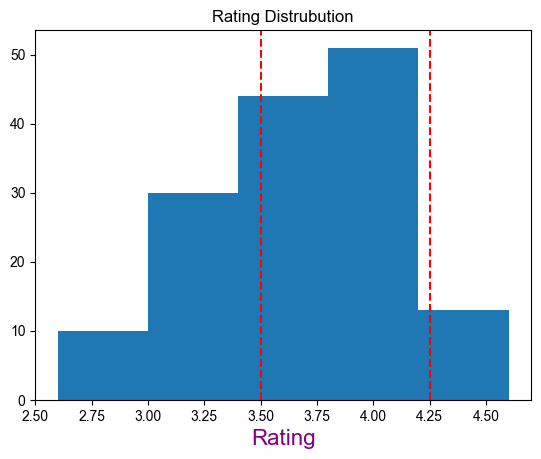

In [8]:
plt.hist(df['rate'],bins=5,)
plt.title("Rating Distrubution")
sns.set_style('whitegrid')
plt.axvline(x=3.5,linestyle='--',color='red')
plt.axvline(x=4.25,linestyle ='--',color ='red')
plt.xlabel('Rating',fontsize=16,color='purple')
plt.show()

### ```CONCLUSION```: 3.5-4.5 are the rating that  majority restaurant received.

## Q4 **ZOMATO HAS OBSERVED THAT MOST COUPLES ORDER MOST OF THEIR FOOD ONLINE. WHAT IS THEIR AVERAGE SPENDINGON EACH ORDER?**

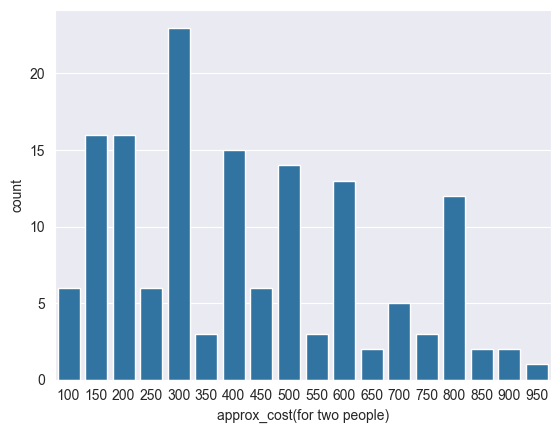

In [25]:
couple_data =df['approx_cost(for two people)']
sns.countplot(x=couple_data)
sns.set_style('darkgrid',)


### ```CONCLUSION```: The majority of couples prefer restraurant with an approximate cost of 300 rupee.

## Q5 **WHICH MODE(ONLINE OR OFFLINE) HAS RECEIVED THE MAXIMUM RATING?**

<Axes: xlabel='online_order', ylabel='rate'>

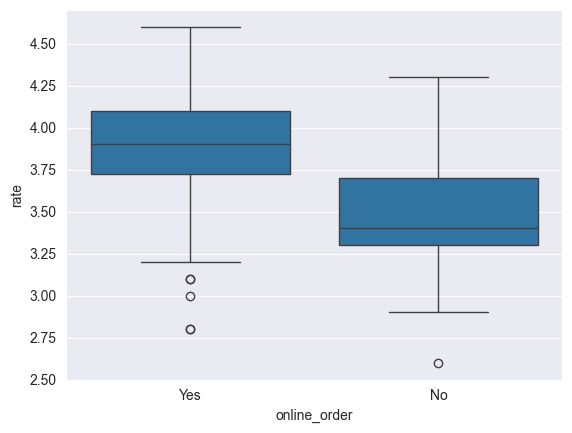

In [29]:
plt.Figure(figsize=(6,6))

sns.boxplot(x='online_order',y='rate',data=df)

### ```CONCLUSION```: Offline order received lower rating in comparision to online.

## Q5 **WHICH TYPE OF RESAURANT RECEIVED MORE OFFLINE ORDERS, SO THAT ZOMATO CAN**

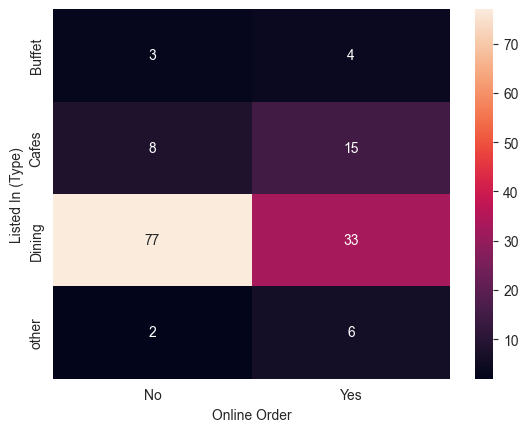

In [34]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(data=pivot_table,annot=True,fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
sns.set_style('darkgrid')
plt.show()